# Working with data using Pandas

***Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.***

## Table of Contents
---
* [1. Importing libraries](#importing_libraries)
* [2. Importing dataset](#importing_dataset)
<br>
   * [2.1. Dataset import](#dataset_import)
   * [2.2. Let's take a look](#lets_take_a_look)
   * [2.3. Splitting Dataset](#splitting_dataset)<br>
<br>
* [3. Data preprocessing and feature engineering](#data_preprocessing_and_feature_engineering)
<br>
   * [3.1. Pclass](#pclass)
   * [3.2. Sex](#sex)
   * [3.3. Embarked](#embarked)
   * [3.4. Fare](#fare)
   * [3.5. Cabin](#cabin)
   * [3.6. Age](#age)
   * [3.7. Family Size](#family_size)
   * [3.8. Title](#title)
   * [3.9. Data Cleaning](#data_cleaning)
   * [3.10. Correlation Heatmap](#correlation_heatmap) <br>
<br>      
* [4. Classification](#classification)
<br>
   * [4.1. Dataset preperation](#dataset_preperation)
   * [4.2. Decision Tree Classifier](#decision_tree_classifier)
   * [4.3. Classifiers feature importances](#classifiers_feature_importances) <br>
<br>      
* [5. Resources](#resources)

## 1. Importing libraries
<a id="importing_libraries"></a>

In [1]:
import numpy as np
# pip install pandas
import pandas as pd
# pip install missingno
import missingno as msno

import re

from sklearn.model_selection import train_test_split

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# pip install plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

## 2. Importing dataset
<a id="importing_dataset"></a>

### 2.1. Dataset import
<a id="dataset_import"></a>

In [2]:
# Importing the dataset
dataset = pd.read_csv('Titanic_train.csv', header = 0, dtype={'Age': np.float64})

### 2.2. Let's take a look
<a id="lets_take_a_look"></a>

In [3]:
dataset.shape

(891, 12)

In [4]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>NOTE:</b> Names of features, along with a brief description:
* Survival - [label] Survival of passenger: 0 = No, 1 = Yes
* Pclass - Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
* Sex - Passenger gender
* Age - Age of passenger in years
* SibSp	- Number of siblings / spouses aboard the Titanic
* Parch	- Number of parents / children aboard the Titanic
* Ticket - Ticket number
* Fare - Passenger fare
* Cabin - Cabin number
* Embarked - Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<b>NOTE:</b> Let's use "Missingno" package, which is a most useful and convenient tool in visualising missing values in the dataset.

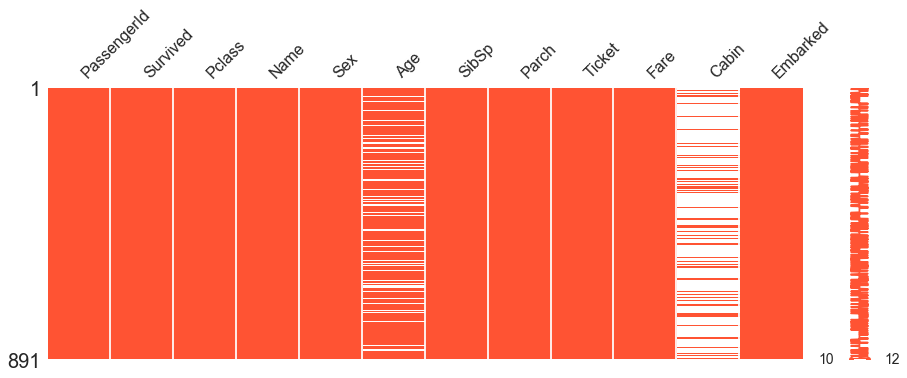

In [7]:
msno.matrix(df=dataset, figsize=(15, 5), color=(255/255, 83/255, 51/255))

<b>NOTE:</b> Right away we see that data set contains columns that require correcting. Cabin and Age features are incomplete. Moreover five features are strings and aren't really useful in current form. Our job is to preprocess data and extract from those columns essential informations.

### 2.3. Splitting Dataset
<a id="splitting_dataset"></a>

In [8]:
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=0)

## 3. Data preprocessing and feature engineering
<a id="data_preprocessing_and_feature_engineering"></a>

<b>NOTE:</b> Let's look at out features one by one:

### 3.1. Pclass
<a id="pclass"></a>

<b>NOTE:</b> There are no missing values on this feature and it is already a numerical value. Let's check it's impact on our train set:

In [9]:
print (test_set[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.695652
1       2  0.473684
2       3  0.200000


In [10]:
passengers_by_class = test_set[['Pclass', 'Survived']].groupby(['Pclass']).count()
passengers_by_class_sur = test_set[['Pclass', 'Survived']].groupby(['Pclass']).sum()

trace1 = go.Bar(
    x = ['First', 'Second', 'Third'],
    y = passengers_by_class_sur['Survived'].tolist(),
    name='Survived',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = ['First', 'Second', 'Third'],
    y = (passengers_by_class['Survived'] - passengers_by_class_sur['Survived']).tolist(),
    name='Drowned',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title = 'Survival vs Class',
    width=900,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(title= 'Number of passengers'),
    xaxis = dict(title= 'Class')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.2. Sex
<a id="sex"></a>

<b>NOTE:</b> This feature is also complete but this time it is not a numerical value. We will need to conduct feature mapping.

In [11]:
for set_ in (train_set, test_set):
    set_['Sex'] = set_['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [12]:
print (train_set[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

   Sex  Survived
0    0  0.744939
1    1  0.191398


In [13]:
passengers_by_sex = train_set[['Sex', 'Survived']].groupby(['Sex']).count()
passengers_by_sex_sur = train_set[['Sex', 'Survived']].groupby(['Sex']).sum()

trace1 = go.Bar(
    x = ['Femail', 'Mail'],
    y = passengers_by_sex_sur['Survived'].tolist(),
    name='Survived',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = ['Femail', 'Mail'],
    y = (passengers_by_sex['Survived'] - passengers_by_sex_sur['Survived']).tolist(),
    name='Drowned',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title = 'Survival vs Sex',
    width=900,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(title= 'Number of passengers'),
    xaxis = dict(title= 'Sex')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.3. Embarked
<a id="embarked"></a>

In [14]:
print (train_set[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).count())

  Embarked  Survived
0        C       129
1        Q        64
2        S       517


<b>NOTE:</b> The embarked feature contains information about port of embarkation, unfortunately it has some missing values. <b>We try to fill those with the most occurred value in the train_set ( 'S' ).</b> Next we will map string values into numeric ones.

In [15]:
for set_ in (train_set, test_set):
    # Filling missing values with most occurred one
    set_['Embarked'] = set_['Embarked'].fillna('S')

    # Mapping Embarked
    set_['Embarked'] = set_['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

print (train_set[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

   Embarked  Survived
0         0  0.342967
1         1  0.527132
2         2  0.421875


### 3.4. Fare
<a id="fare"></a>

<b>NOTE:</b> Fare feature also has some missing value. <b>We replace those values with the median</b>.

In [16]:
for set_ in (train_set, test_set):
    # Fill NA/NaN values using the specified method
    set_['Fare'] = set_['Fare'].fillna(set_['Fare'].median())

<b>NOTE:</b> Then we categorize data into 4 ranges based od train_set and map it into numerical categories. Let's use qcut to find the boundaries of intervals.

In [17]:
pd.qcut(train_set['Fare'], 4).unique()

[(14.456, 31.275], (7.918, 14.456], (31.275, 512.329], (-0.001, 7.918]]
Categories (4, interval[float64]): [(-0.001, 7.918] < (7.918, 14.456] < (14.456, 31.275] < (31.275, 512.329]]

In [18]:
for set_ in (train_set, test_set):
    # Mapping Fare
    set_.loc[ set_['Fare'] <= 7.918, 'Fare'] = 0
    set_.loc[(set_['Fare'] > 7.918) & (set_['Fare'] <= 14.456), 'Fare'] = 1
    set_.loc[(set_['Fare'] > 14.456) & (set_['Fare'] <= 31.275), 'Fare']   = 2
    set_.loc[ set_['Fare'] > 31.275, 'Fare']  = 3
    set_['Fare'] = set_['Fare'].astype(int)

print (train_set[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean())

   Fare  Survived
0     0  0.219101
1     1  0.320225
2     2  0.420765
3     3  0.578035


In [19]:
fare = train_set[['Fare', 'Survived']].groupby(['Fare']).count()
fare_sur = train_set[['Fare', 'Survived']].groupby(['Fare']).sum()

trace1 = go.Bar(
    x = ['Low', 'Medium', 'High', 'Premium'],
    y = fare_sur['Survived'].tolist(),
    name='Survived',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = ['Low', 'Medium', 'High', 'Premium'],
    y = (fare['Survived'] - fare_sur['Survived']).tolist(),
    name='Drowned',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title = 'Survival vs Fare',
    width=900,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(title= 'Number of passengers'),
    xaxis = dict(title= 'Fare')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.5. Cabin
<a id="cabin"></a>

<b>NOTE:</b> Feature that tells whether a passenger had a cabin on the Titanic.

In [20]:
for set_ in (train_set, test_set):
    set_['Has_Cabin'] = set_["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

### 3.6. Age
<a id="age"></a>

<b>NOTE:</b> We have plenty of missing values in this feature. We fill blanks with random numbers between (mean - std) and (mean + std). (std and mean refer to the training set)

In [21]:
age_avg = train_set['Age'].mean()
age_std = train_set['Age'].std()

print("Mean value: " + str(round(age_avg, 2)));
print("Std value: " + str(round(age_std, 2)));

Mean value: 29.75
Std value: 14.62


In [22]:
for set_ in (train_set, test_set):
    age_null_count = set_['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    
    set_['Age'][np.isnan(set_['Age'])] = age_null_random_list
    set_['Age'] = set_['Age'].astype(int)

<b>NOTE:</b> Now we categorize age into 5 range and map them into numerical categories, just like for "Cabin" feature.

In [23]:
pd.cut(train_set['Age'], 5).unique()

[(16.0, 32.0], (32.0, 48.0], (-0.08, 16.0], (64.0, 80.0], (48.0, 64.0]]
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [24]:
for set_ in (train_set, test_set):
    # Mapping Age
    set_.loc[ set_['Age'] <= 16, 'Age'] = 0
    set_.loc[(set_['Age'] > 16) & (set_['Age'] <= 32), 'Age'] = 1
    set_.loc[(set_['Age'] > 32) & (set_['Age'] <= 48), 'Age'] = 2
    set_.loc[(set_['Age'] > 48) & (set_['Age'] <= 64), 'Age'] = 3
    set_.loc[ set_['Age'] > 64, 'Age'] = 4

In [25]:
age = train_set[['Age', 'Survived']].groupby(['Age']).count()
age_sur = train_set[['Age', 'Survived']].groupby(['Age']).sum()

trace1 = go.Bar(
    x = ['[0 - 16]', '(16 - 32]', '(32 - 48]', '(48 - 64]', '(64 - ...]'],
    y = age_sur['Survived'].tolist(),
    name='Survived',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = ['[0 - 16]', '(16 - 32]', '(32 - 48]', '(48 - 64]', '(64 - ...]'],
    y = (age['Survived'] - age_sur['Survived']).tolist(),
    name='Drowned',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)
trace3 = go.Scatter(
    x = ['[0 - 16]', '(16 - 32]', '(32 - 48]', '(48 - 64]', '(64 - ...]'],
    y = (age_sur['Survived'] * 100 / age['Survived']).tolist(),
    name='Survival %',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack',
    title = 'Survival vs Age',
    width=900,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(title= 'Number of passengers'),
    xaxis = dict(title= 'Age'),
    yaxis2=dict(
        title='Survival %',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 24.3
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.7. Family Size
<a id="family_size"></a>

<b>NOTE:</b> Using the number of siblings/spouse and the number of children/parents we can create new feature called Family Size.

In [26]:
for set_ in (train_set, test_set):
    set_['FamilySize'] = set_['SibSp'] + set_['Parch'] + 1
    
print (train_set[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.311628
1           2  0.539683
2           3  0.555556
3           4  0.680000
4           5  0.153846
5           6  0.214286
6           7  0.363636
7           8  0.000000
8          11  0.000000


In [27]:
family_labels = train_set.sort_values("FamilySize")["FamilySize"].unique()
family = train_set[['FamilySize', 'Survived']].groupby(['FamilySize']).count()
family_sur = train_set[['FamilySize', 'Survived']].groupby(['FamilySize']).sum()

trace1 = go.Bar(
    x = family_labels.tolist(),
    y = family_sur['Survived'].tolist(),
    name='Survived',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = family_labels.tolist(),
    y = (family['Survived'] - family_sur['Survived']).tolist(),
    name='Drowned',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = family_labels.tolist(),
    y = (family_sur['Survived'] * 100 / family['Survived']).tolist(),
    name='Survival %',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'Survival vs Size of Family',
    width=1000,
    height=600,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    yaxis = dict(
        title= 'Number of passengers',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Size of Family'),
    
    yaxis2=dict(
        title='Survival %',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 11.6
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

<b>NOTE:</b> It seems that new feature has a good effect on our prediction, but let's go further and categorize people to check whether they are alone in this ship or not.

In [28]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Has_Cabin',
       'FamilySize'],
      dtype='object')

In [29]:
for set_ in (train_set, test_set):
    set_['IsAlone'] = 0
    set_.loc[set_['FamilySize'] == 1, 'IsAlone'] = 1
print (train_set[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.492908
1        1  0.311628


### 3.8. Title
<a id="title"></a>

<b> NOTE: </b> Lastly we will use Name feature to create new one - Title. We will use short funtion to extract titles from name strings and transform them into numerical categorical values.

In [30]:
# Short function to extruct titles 
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [31]:
# Create a new feature Title, containing the titles of passenger names
for set_ in (train_set, test_set):
    set_['Title'] = set_['Name'].apply(get_title)

In [32]:
train_set['Title'].unique()

array(['Mrs', 'Mr', 'Miss', 'Col', 'Master', 'Ms', 'Rev', 'Dr', 'Mlle',
       'Mme', 'Countess', 'Major', 'Lady', 'Capt', 'Sir'], dtype=object)

In [33]:
# Group all non-common titles into one single grouping "Rare"
for set_ in (train_set, test_set):
    set_['Title'] = set_['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    set_['Title'] = set_['Title'].replace('Mlle', 'Miss')
    set_['Title'] = set_['Title'].replace('Ms', 'Miss')
    set_['Title'] = set_['Title'].replace('Mme', 'Mrs')

for set_ in (train_set, test_set):
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    set_['Title'] = set_['Title'].map(title_mapping)
    set_['Title'] = set_['Title'].fillna(0)

In [34]:
title = train_set[['Title', 'Survived']].groupby(['Title']).count()
title_sur = train_set[['Title', 'Survived']].groupby(['Title']).sum()

trace1 = go.Bar(
    x = ['Mr', 'Miss', 'Mrs', 'Master', 'Rare'],
    y = title_sur['Survived'].tolist(),
    name='Survived',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
   x = ['Mr', 'Miss', 'Mrs', 'Master', 'Rare'],
    y = (title['Survived'] - title_sur['Survived']).tolist(),
    name='Drowned',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)
trace3 = go.Scatter(
    x = ['Mr', 'Miss', 'Mrs', 'Master', 'Rare'],
    y = (title_sur['Survived'] * 100 / title['Survived']).tolist(),
    name='Survival %',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack',
    title = 'Survival vs Title',
    width=1000,
    height=500,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    yaxis = dict(title= 'Number of passengers'),
    xaxis = dict(title= 'title'),
    yaxis2=dict(
        title='Survival %',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 19.2
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.9. Data Cleaning
<a id="data_cleaning"></a>

In [35]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Has_Cabin',
       'FamilySize', 'IsAlone', 'Title'],
      dtype='object')

In [36]:
# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']

train_set = train_set.drop(drop_elements, axis = 1)
test_set = test_set.drop(drop_elements, axis = 1)

In [37]:
print (train_set.head(10))

train = train_set.values
test  = test_set.values

     Survived  Pclass  Sex  Age  Fare  Embarked  Has_Cabin  FamilySize  \
140         0       3    0    1     2         1          0           3   
439         0       2    1    1     1         0          0           1   
817         0       2    1    1     3         1          0           3   
378         0       3    1    1     0         1          0           1   
491         0       3    1    1     0         0          0           1   
331         0       1    1    2     2         0          1           1   
588         0       3    1    1     1         0          0           1   
358         1       3    0    2     0         2          0           1   
674         0       2    1    1     0         0          0           1   
162         0       3    1    1     0         0          0           1   

     IsAlone  Title  
140        0      3  
439        1      1  
817        0      1  
378        1      1  
491        1      1  
331        1      1  
588        1      1  
358      

### 3.10. Correlation Heatmap
<a id="correlation_heatmap"></a>

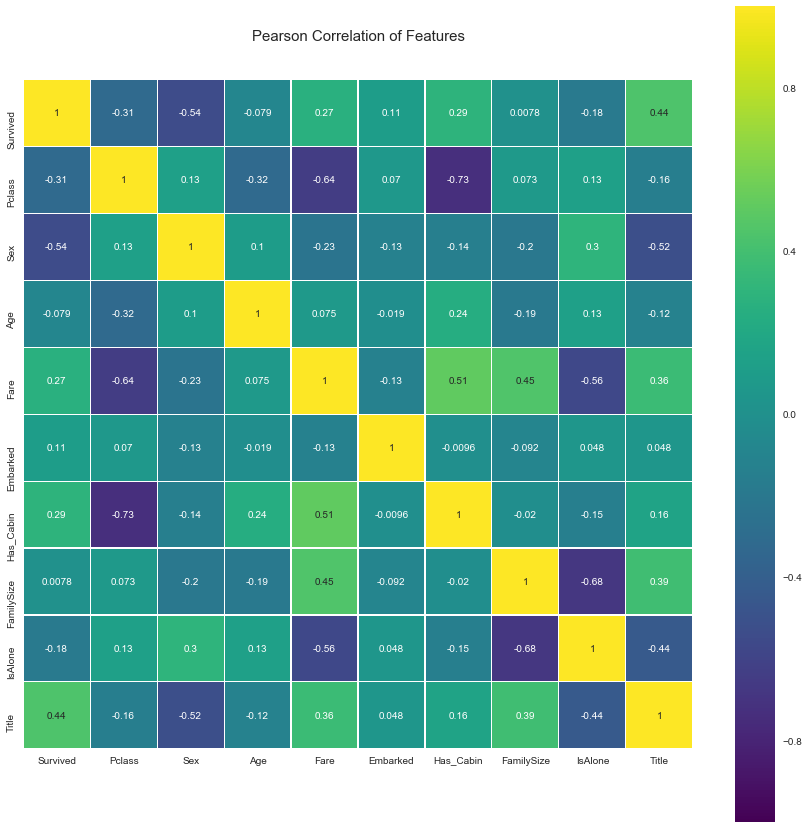

In [38]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

## 4. Classification
<a id="classification"></a>

### 4.1. Dataset preperation
<a id="dataset_preperation"></a>

In [39]:
y_train = train_set['Survived'].ravel()
X_train = train_set.drop(['Survived'], axis=1).values

y_test = test_set['Survived'].ravel()
X_test = test_set.drop(['Survived'], axis=1).values

### 4.2. Decision Tree Classifier
<a id="decision_tree_classifier"></a>

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier_DTC = DecisionTreeClassifier(criterion='gini', random_state = 0)
classifier_DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [41]:
acc_DTC = round(classifier_DTC.score(X_test, y_test) * 100, 2)
acc_DTC

82.680000000000007

### 4.3. Classifiers feature importances
<a id="classifiers_feature_importances"></a>

In [42]:
feature_importances_DTC = classifier_DTC.feature_importances_
columns = train_set.drop(['Survived'], axis=1).columns.values

trace1 = go.Scatter(
    x = columns,
    y = feature_importances_DTC.tolist(),
    name='Decision Tree Classifier',
    mode = 'lines+markers',
)

data = [trace1]
layout = go.Layout(
    barmode='stack',
    title = 'Features importance',
    width=1000,
    height=600,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    yaxis = dict(title= 'Feature importance'),
    xaxis = dict(title= 'Features')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## 5. Resources
<a id="resources"></a>

https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

https://machinelearningmastery.com/how-to-prepare-data-for-machine-learning/

https://www.youtube.com/watch?time_continue=59&v=drUToKxEAUA